# Who kidnapped the mayor?
- Datasets: historical crimes + monster suspects
- Evidence constraints: location, time, weapon, evidence
- Goal: filter relevant crimes and identify the most probable suspect

### Step 1
Import and Initialize DataFrame

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt

print("all imports were successful")
crimeData = pd.read_csv('data/Crimes_Dataset.csv')
for col in crimeData.select_dtypes(include="object").columns:
    crimeData[col] = crimeData[col].str.lower()
# print("\n\nCrime Data Info:")
# print(crimeData.info())
suspectData = pd.read_csv('data/Suspects_Dataset.csv')
for col in suspectData.select_dtypes(include="object").columns:
    suspectData[col] = suspectData[col].str.lower()
# print("\n\nSuspect Data Info:")
# print(suspectData.info())

all imports were successful


### Step 2
- Explore kidnapping frequency by monster type
- Purpose: baseline propensity by type

/var/folders/00/yqwvb5x9763g3xpwdvvm05700000gn/T/ipykernel_1735/2899501747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monster_counts_kidnap, x="Monster", y="Anzahl_Kidnappings", palette="viridis")


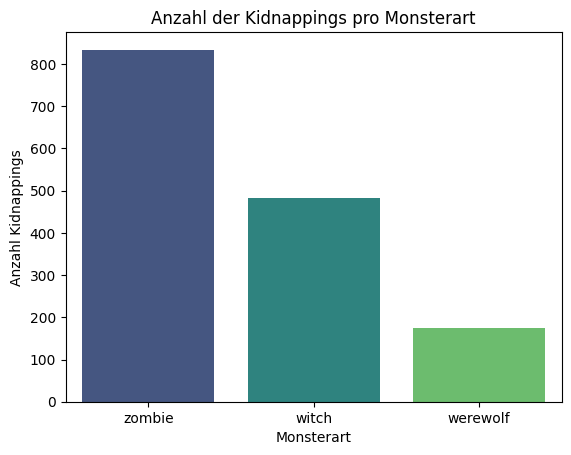

In [2]:
df_kidnap = crimeData[crimeData["Crime Type"] == "kidnapping"]
monster_counts_kidnap = df_kidnap["Monster involved"].value_counts().reset_index()
monster_counts_kidnap.columns = ["Monster", "Anzahl_Kidnappings"]

# Plot
sns.barplot(data=monster_counts_kidnap, x="Monster", y="Anzahl_Kidnappings", palette="viridis")
plt.title("Anzahl der Kidnappings pro Monsterart")
plt.xlabel("Monsterart")
plt.ylabel("Anzahl Kidnappings")
plt.show()

### Step 3
- Additional plots to profile suspects:
  - Bones as evidence
  - Daytime crimes
  - Village location
  - Knife used

/var/folders/00/yqwvb5x9763g3xpwdvvm05700000gn/T/ipykernel_1735/2037632010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monster_counts_evidence, x="Monster", y="Anzahl_Beweise", palette="viridis")


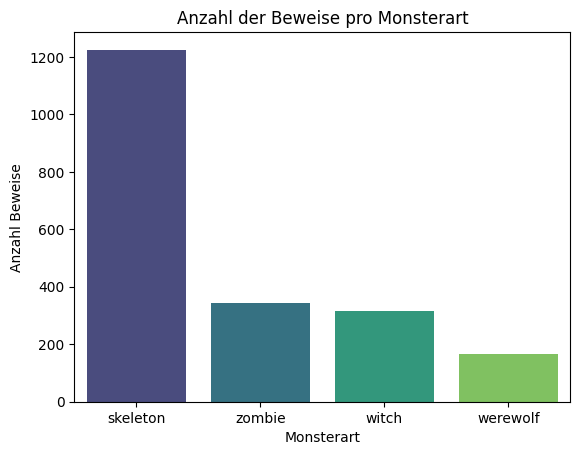

In [3]:
df_evidence_found = crimeData[crimeData["Evidence Found"] == "bones"]
monster_counts_evidence = df_evidence_found["Monster involved"].value_counts().reset_index()
monster_counts_evidence.columns = ["Monster", "Anzahl_Beweise"]

# Plot
sns.barplot(data=monster_counts_evidence, x="Monster", y="Anzahl_Beweise", palette="viridis")
plt.title("Anzahl der Beweise pro Monsterart")
plt.xlabel("Monsterart")
plt.ylabel("Anzahl Beweise")
plt.show()

/var/folders/00/yqwvb5x9763g3xpwdvvm05700000gn/T/ipykernel_1735/4264516098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monster_counts_days, x="Monster", y="Anzahl_Tagesverbrechen", palette="viridis")


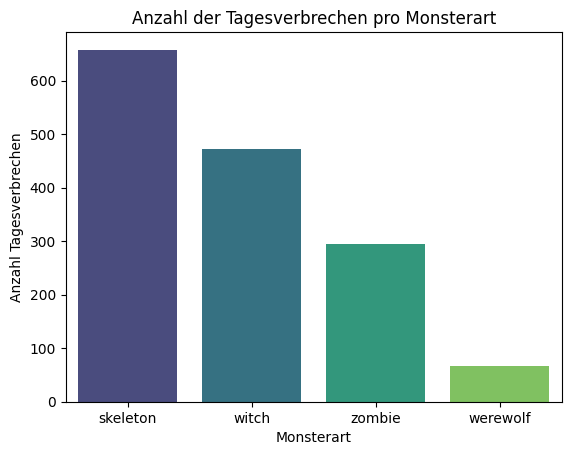

In [4]:
df_days = crimeData[crimeData["Time of Day"].isin(["day"])]
monster_counts_days = df_days["Monster involved"].value_counts().reset_index()
monster_counts_days.columns = ["Monster", "Anzahl_Tagesverbrechen"]
# Plot
sns.barplot(data=monster_counts_days, x="Monster", y="Anzahl_Tagesverbrechen", palette="viridis")
plt.title("Anzahl der Tagesverbrechen pro Monsterart")
plt.xlabel("Monsterart")
plt.ylabel("Anzahl Tagesverbrechen")
plt.show()

/var/folders/00/yqwvb5x9763g3xpwdvvm05700000gn/T/ipykernel_1735/2899746518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monster_counts_village, x="Monster", y="Anzahl_Dorfverbrechen", palette="viridis")


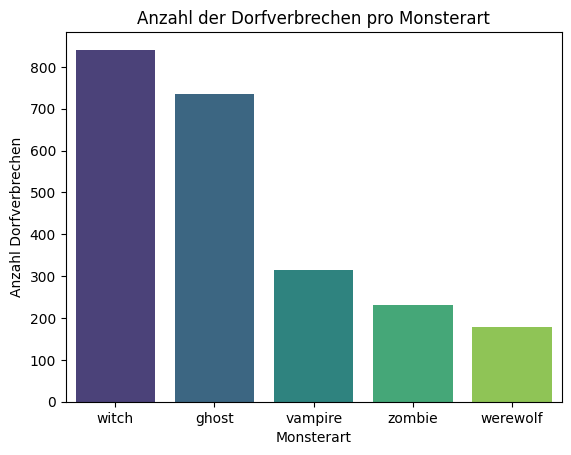

In [5]:
df_village = crimeData[crimeData["Region"] == "village"]
monster_counts_village = df_village["Monster involved"].value_counts().reset_index()
monster_counts_village.columns = ["Monster", "Anzahl_Dorfverbrechen"]
# Plot
sns.barplot(data=monster_counts_village, x="Monster", y="Anzahl_Dorfverbrechen", palette="viridis")
plt.title("Anzahl der Dorfverbrechen pro Monsterart")
plt.xlabel("Monsterart")
plt.ylabel("Anzahl Dorfverbrechen")
plt.show()

/var/folders/00/yqwvb5x9763g3xpwdvvm05700000gn/T/ipykernel_1735/1431016028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monster_counts_knife, x="Monster", y="Anzahl_Messerverbrechen", palette="viridis")


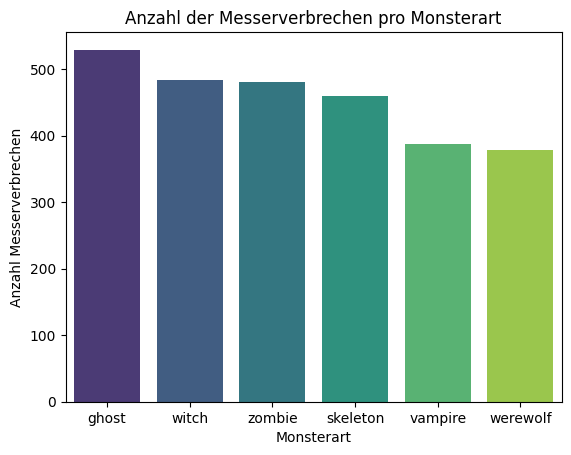

In [6]:
df_knife = crimeData[crimeData["Crime Weapon"] == "knife"]
monster_counts_knife = df_knife["Monster involved"].value_counts().reset_index()
monster_counts_knife.columns = ["Monster", "Anzahl_Messerverbrechen"]
# Plot
sns.barplot(data=monster_counts_knife, x="Monster", y="Anzahl_Messerverbrechen", palette="viridis")
plt.title("Anzahl der Messerverbrechen pro Monsterart")
plt.xlabel("Monsterart")
plt.ylabel("Anzahl Messerverbrechen")
plt.show()

## Constraints and method
Constraints:
- Region: village
- Crime: kidnapping
- Weapon: knife
- Time: day
- Evidence: bones

Method:
- Lowercase text fields
- EDA by clue dimension
- Filter by all constraints
- Join suspect profiles for shortlist

### Step 4
Combining all constrains given by the data to determine final suspect list

In [7]:
df_all_clues = crimeData[(crimeData["Region"] == "village")  
                        & (crimeData["Crime Type"] == "kidnapping") 
                        & (crimeData["Crime Weapon"] == "knife") 
                        & (crimeData["Time of Day"] == "day") 
                        & (crimeData["Evidence Found"] == "bones")]
df_all_clues.head(10)

,Index_Crimes,Date,Monster involved,Days of Investigation,Region,Crime Type,Crime Weapon,Time of Day,Evidence Found
3804,9188,2020-11-27,witch,81.0,village,kidnapping,knife,day,bones
4263,6214,2023-10-11,witch,22.0,village,kidnapping,knife,day,bones
4749,3617,2024-05-06,witch,36.0,village,kidnapping,knife,day,bones
5057,1248,2024-03-30,witch,8.0,village,kidnapping,knife,day,bones
6873,336,2023-11-29,witch,14.0,village,kidnapping,knife,day,bones
7703,8577,2023-04-06,witch,87.0,village,kidnapping,knife,day,bones
9114,9394,2024-01-23,witch,60.0,village,kidnapping,knife,day,bones


In [ ]:
# Quick summary of the filtered crimes
N = len(df_all_clues)
total = len(crimeData)
pct = (N / total * 100) if total else 0
print(f"Filtered crimes matching all evidence: {N} ({pct:.2f}% of all crimes)")

# Monster distribution within the filtered set
monster_dist = df_all_clues["Monster involved"].value_counts()
display(monster_dist.head(10))

# Bar chart of the top monster types within the filtered crimes
plt.figure(figsize=(8,4))
sns.barplot(x=monster_dist.head(10).index, y=monster_dist.head(10).values, palette="viridis")
plt.title("Monster types within evidence-matching crimes")
plt.xlabel("Monster type")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

### Step 5
- Candidate shortlist: 7 witches (by Index_Monster)
- Profiles consistent with filtered crime pattern

In [8]:
df_candidates = suspectData[suspectData["Index_Monster"].isin([336, 1248, 3617, 6214, 8577, 9188, 9394])]
df_candidates = df_candidates.sort_values(by=["Index_Monster"]).reset_index()
df_candidates.head(8)
                            

,index,Index_Monster,Monster,Criminal record,Age,Gender,Height in cm,Speed Level,Strength Level,Allergy,Favorite Food
0,9092,336,witch,no,638.0,f,189.0,21.0,2.0,hazelnut,lasagna
1,6749,1248,witch,no,766.0,m,153.0,23.0,3.0,hazelnut,rats
2,4426,3617,witch,no,63.0,m,185.0,18.0,2.0,hazelnut,lasagna
3,5165,6214,witch,yes,559.0,m,178.0,16.0,9.0,hazelnut,humans
4,203,8577,witch,no,204.0,f,162.0,21.0,1.0,garlic,brain
5,4900,9188,witch,yes,485.0,f,199.0,21.0,1.0,hazelnut,lasagna
6,8036,9394,witch,no,607.0,m,197.0,16.0,4.0,hazelnut,rats


In [ ]:
# Compact view of candidate attributes
preferred_cols = [
    'Index_Monster', 'Monster Type', 'Favorite Food', 'Strength',
    'Region', 'Known Behavior', 'Weapon Preference'
]
available_cols = [c for c in preferred_cols if c in df_candidates.columns]
print('Showing columns:', available_cols)
display(df_candidates[available_cols])

# Conclusion
- Most probable suspect: Witch, Index_Monster = 6214
- Reasons: prior kidnappings in village during day, favorite food "humans" and high strength
- Verdict: leading candidate among the 7 shortlisted witches

*By M. Schneider and M. Koncz* 